<a href="https://colab.research.google.com/github/ashishar/data_science_codes/blob/main/King_county_sales.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

*Visualation code credit:* https://www.kaggle.com/code/sauravvsrinku/starter-house-sales-in-king-county-8ceb15de-5 and https://www.kaggle.com/code/ronikdedhia/king-county-house-sales 

In [133]:
#import kaggle dataset
! pip install -q kaggle
from google.colab import files
! mkdir ~/.kaggle
! cp kaggle.json ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json
! kaggle datasets download harlfoxem/housesalesprediction



mkdir: cannot create directory ‘/root/.kaggle’: File exists
housesalesprediction.zip: Skipping, found more recently modified local copy (use --force to force download)


In [134]:
! unzip housesalesprediction.zip
!ls

Archive:  housesalesprediction.zip
replace kc_house_data.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: kc_house_data.csv       
housesalesprediction.zip  kaggle.json  kc_house_data.csv  sample_data


In [135]:
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt # plotting
import numpy as np # linear algebra
import os # accessing directory structure
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns

In [136]:
nRowsRead = 1000 # specify 'None' if want to read whole file
# kc_house_data.csv has 21613 rows in reality, but we are only loading/previewing the first 1000 rows
data_houseing = pd.read_csv('kc_house_data.csv', delimiter=',', nrows = nRowsRead)
data_houseing.dataframeName = 'kc_house_data.csv'
nRow, nCol = data_houseing.shape
print(f'There are {nRow} rows and {nCol} columns')

There are 1000 rows and 21 columns


In [137]:
data_houseing.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [138]:
data_houseing.describe().T

,count,mean,std,min,25%,50%,75%,max
id,1000.0,4.509720e+09,2.867518e+09,1.150089e+07,1.954636e+09,3.873100e+09,7.300250e+09,9.828703e+09
price,1000.0,5.204148e+05,3.394885e+05,8.000000e+04,3.094500e+05,4.350000e+05,6.336938e+05,3.075000e+06
bedrooms,1000.0,3.349000e+00,8.520123e-01,0.000000e+00,3.000000e+00,3.000000e+00,4.000000e+00,7.000000e+00
bathrooms,1000.0,2.045750e+00,7.216233e-01,0.000000e+00,1.500000e+00,2.000000e+00,2.500000e+00,5.000000e+00
sqft_living,1000.0,2.051196e+03,8.879292e+02,3.800000e+02,1.407500e+03,1.900000e+03,2.472500e+03,6.070000e+03
sqft_lot,1000.0,1.470208e+04,2.896103e+04,6.490000e+02,5.428500e+03,8.045000e+03,1.148925e+04,3.153740e+05
floors,1000.0,1.446500e+00,5.173542e-01,1.000000e+00,1.000000e+00,1.000000e+00,2.000000e+00,3.500000e+00
waterfront,1000.0,8.000000e-03,8.912881e-02,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00
view,1000.0,2.370000e-01,7.651251e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,4.000000e+00
condition,1000.0,3.464000e+00,6.893324e-01,1.000000e+00,3.000000e+00,3.000000e+00,4.000000e+00,5.000000e+00


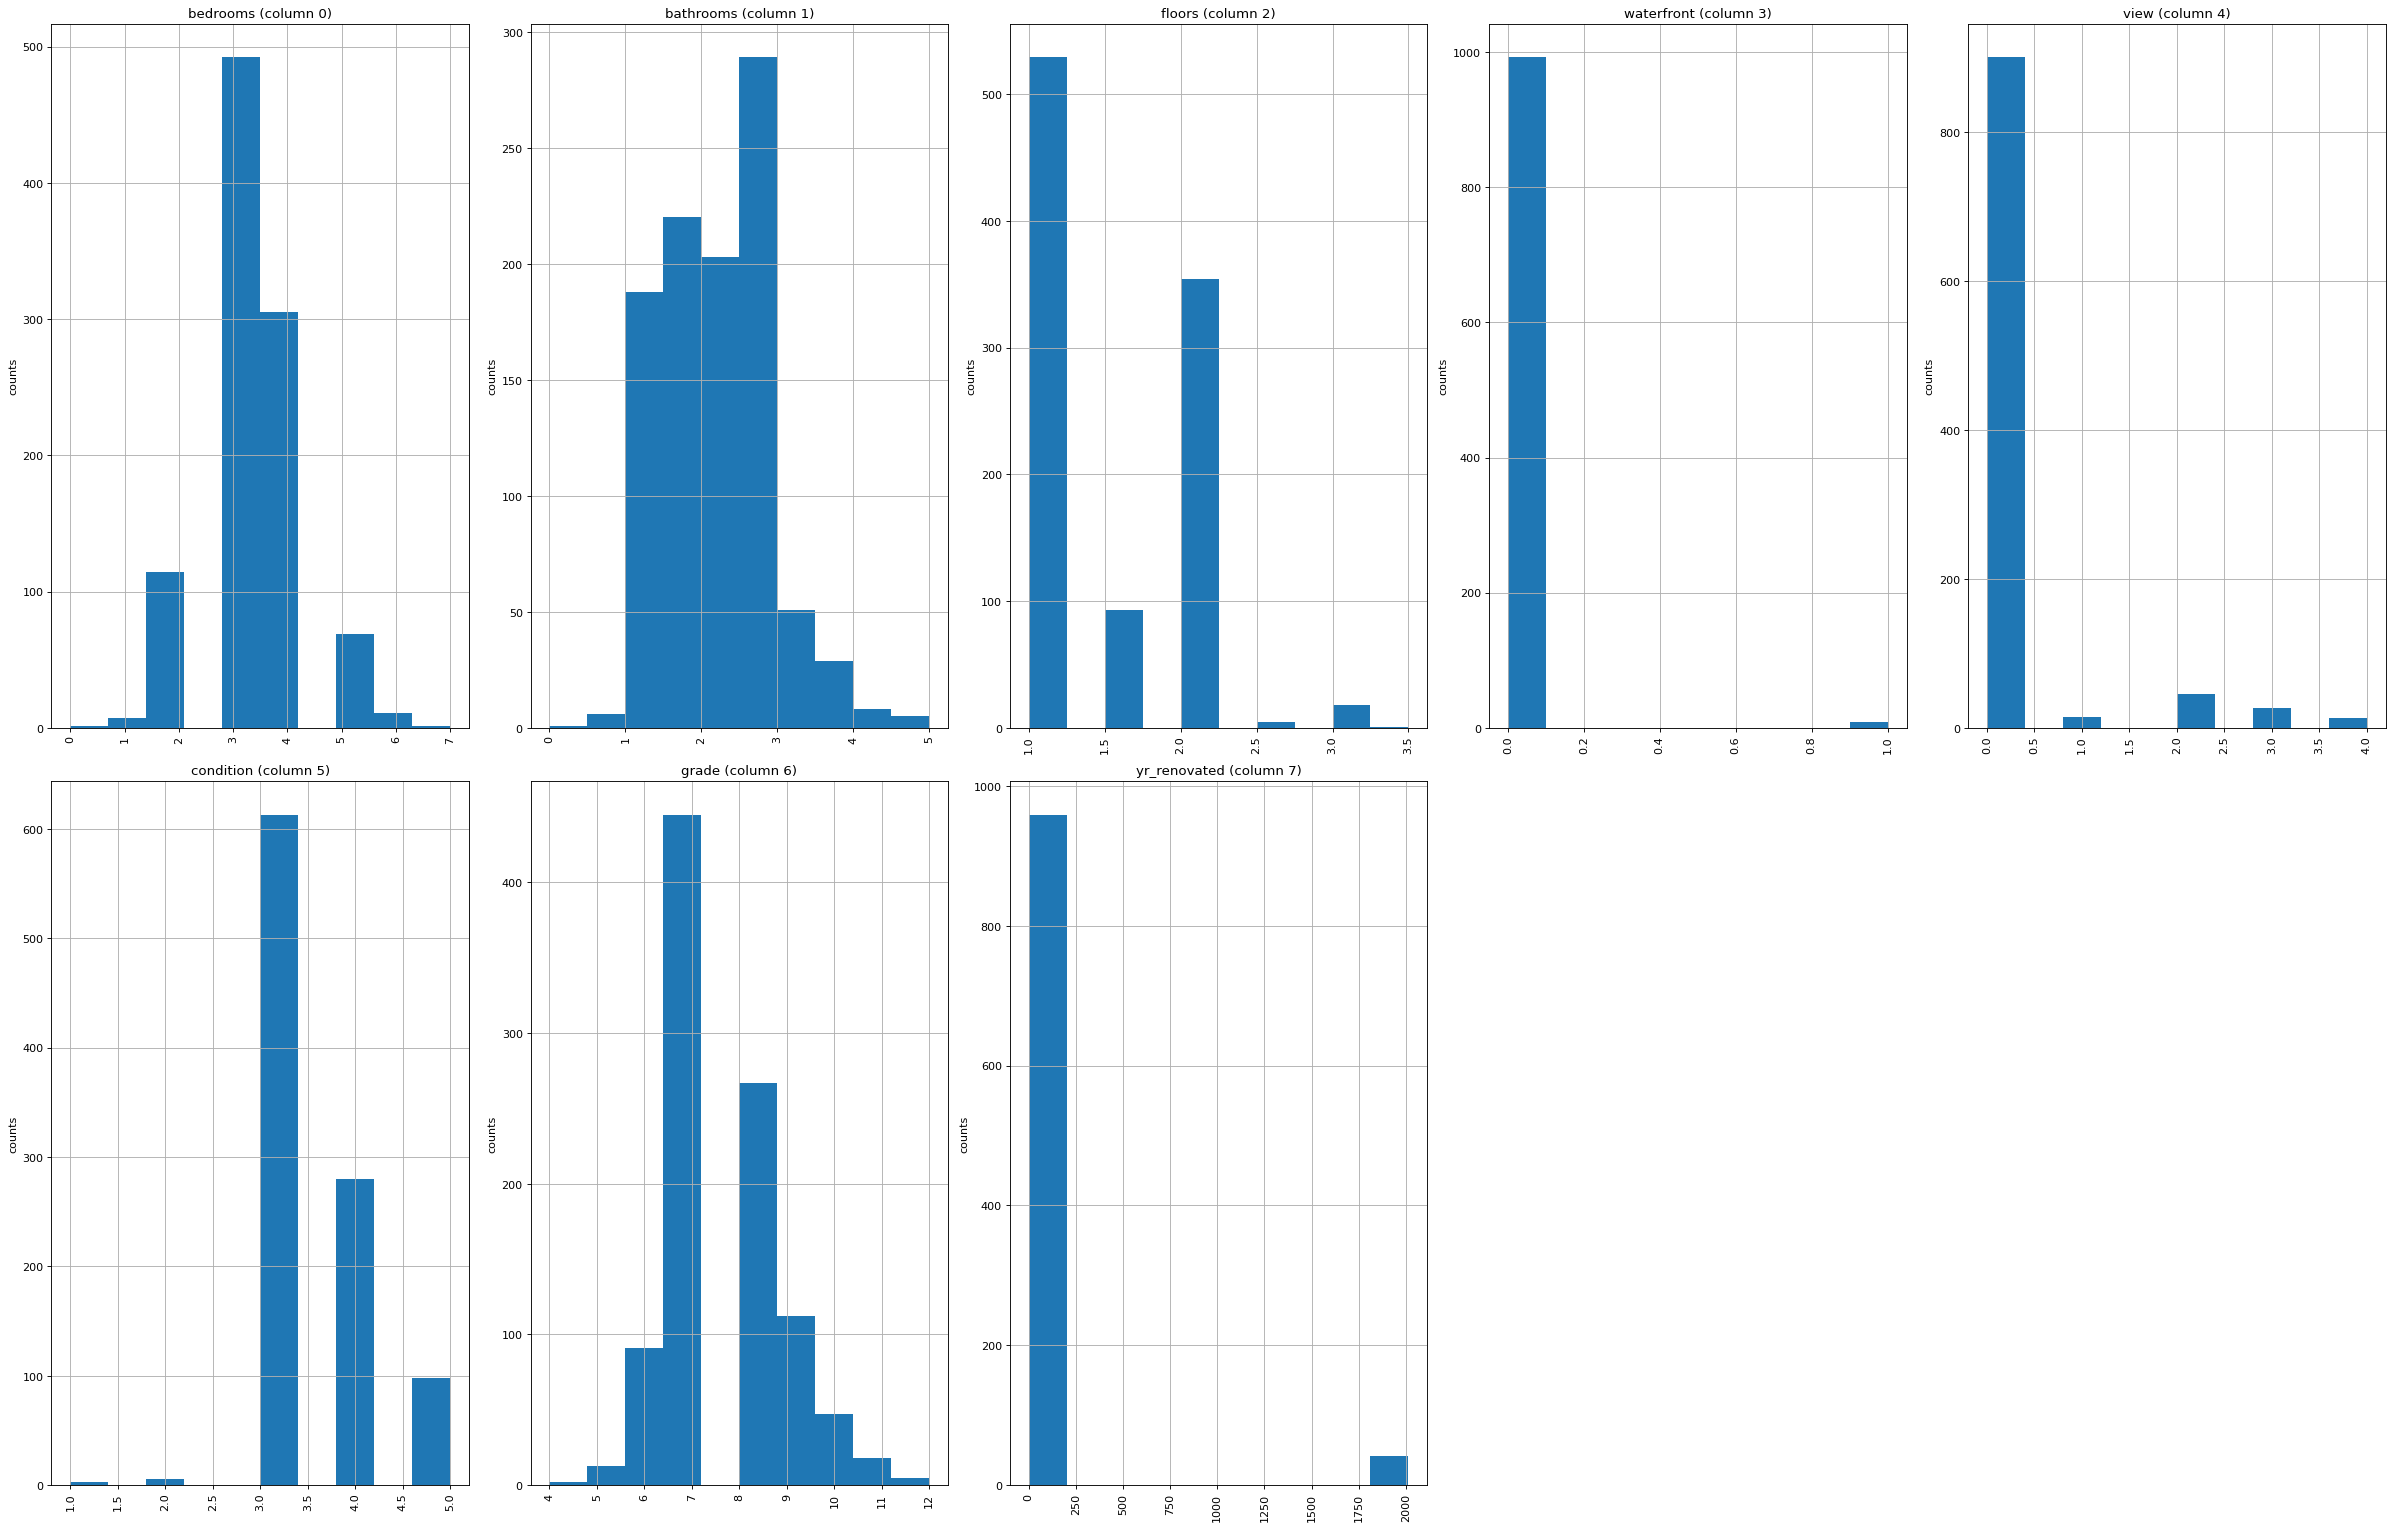

In [139]:
# Distribution graphs (histogram/bar graph) of column data
def plotPerColumnDistribution(df, nGraphShown, nGraphPerRow):
    nunique = df.nunique()
    df = df[[col for col in df if nunique[col] > 1 and nunique[col] < 50]] # For displaying purposes, pick columns that have between 1 and 50 unique values
    nRow, nCol = df.shape
    columnNames = list(df)
    nGraphRow = (nCol + nGraphPerRow - 1) / nGraphPerRow
    plt.figure(num = None, figsize = (6 * nGraphPerRow, 8 * nGraphRow), dpi = 80, facecolor = 'w', edgecolor = 'k')
    for i in range(min(nCol, nGraphShown)):
        plt.subplot(nGraphRow, nGraphPerRow, i + 1)
        columnDf = df.iloc[:, i]
        if (not np.issubdtype(type(columnDf.iloc[0]), np.number)):
            valueCounts = columnDf.value_counts()
            valueCounts.plot.bar()
        else:
            columnDf.hist()
        plt.ylabel('counts')
        plt.xticks(rotation = 90)
        plt.title(f'{columnNames[i]} (column {i})')
    plt.tight_layout(pad = 1.0, w_pad = 1.0, h_pad = 1.0)
    plt.show()
  
plotPerColumnDistribution(data_houseing, 10, 5)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: FutureWarning: In a future version of pandas all arguments of DataFrame.dropna will be keyword-only
  after removing the cwd from sys.path.


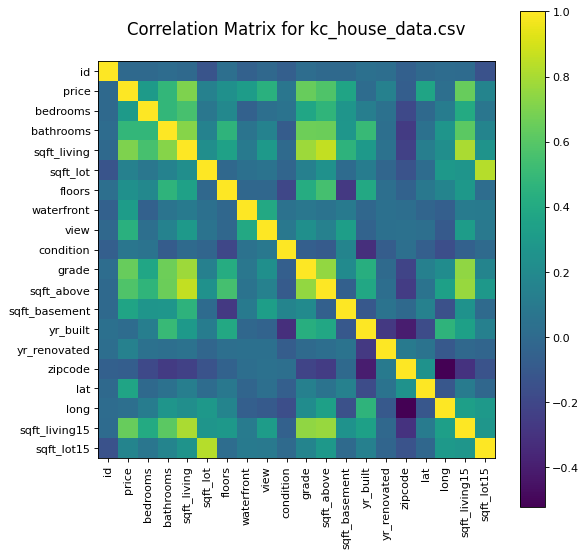

In [140]:
# Correlation matrix
def plotCorrelationMatrix(df, graphWidth):
    filename = df.dataframeName
    df = df.dropna('columns') # drop columns with NaN
    df = df[[col for col in df if df[col].nunique() > 1]] # keep columns where there are more than 1 unique values
    if df.shape[1] < 2:
        print(f'No correlation plots shown: The number of non-NaN or constant columns ({df.shape[1]}) is less than 2')
        return
    corr = df.corr()
    plt.figure(num=None, figsize=(graphWidth, graphWidth), dpi=80, facecolor='w', edgecolor='k')
    corrMat = plt.matshow(corr, fignum = 1)
    plt.xticks(range(len(corr.columns)), corr.columns, rotation=90)
    plt.yticks(range(len(corr.columns)), corr.columns)
    plt.gca().xaxis.tick_bottom()
    plt.colorbar(corrMat)
    plt.title(f'Correlation Matrix for {filename}', fontsize=15)
    plt.show()

plotCorrelationMatrix(data_houseing, 8)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: FutureWarning: In a future version of pandas all arguments of DataFrame.dropna will be keyword-only
  """


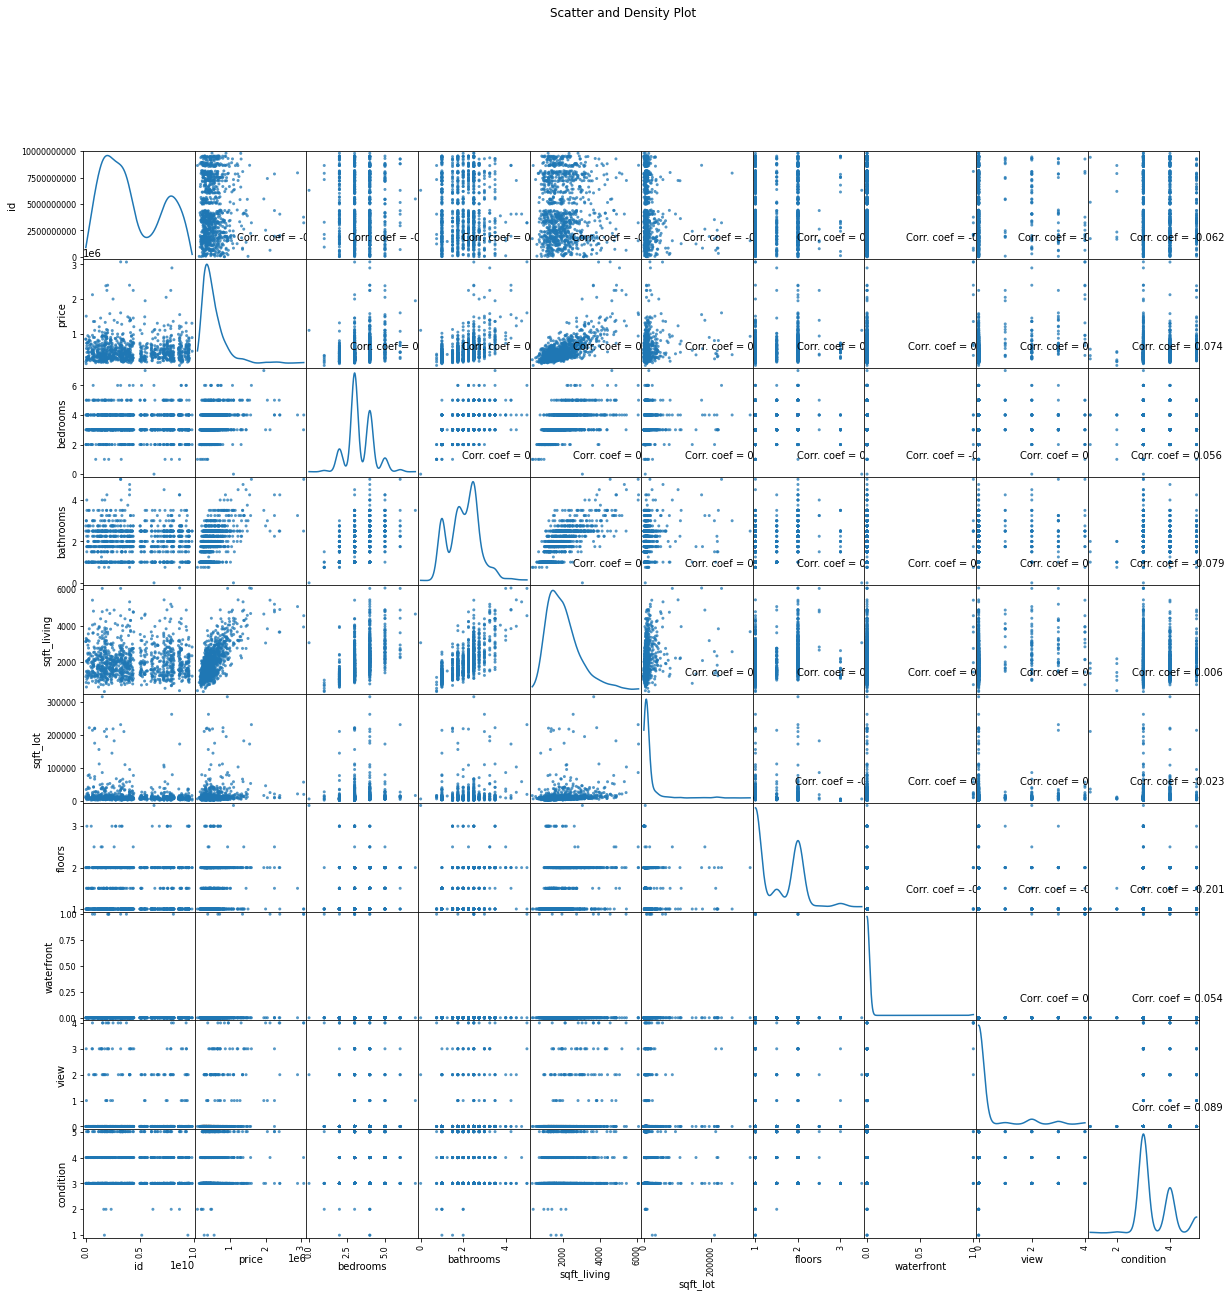

In [141]:
# Scatter plots
def plotScatterMatrix(df, plotSize, textSize):
    df = df.select_dtypes(include =[np.number]) # keep only numerical columns
    # Remove rows and columns that would lead to df being singular
    df = df.dropna('columns')
    df = df[[col for col in df if df[col].nunique() > 1]] # keep columns where there are more than 1 unique values
    columnNames = list(df)
    if len(columnNames) > 10: # reduce the number of columns for matrix inversion of kernel density plots
        columnNames = columnNames[:10]
    df = df[columnNames]
    ax = pd.plotting.scatter_matrix(df, alpha=0.75, figsize=[plotSize, plotSize], diagonal='kde')
    corrs = df.corr().values
    for i, j in zip(*plt.np.triu_indices_from(ax, k = 1)):
        ax[i, j].annotate('Corr. coef = %.3f' % corrs[i, j], (0.8, 0.2), xycoords='axes fraction', ha='center', va='center', size=textSize)
    plt.suptitle('Scatter and Density Plot')
    plt.show()
plotScatterMatrix(data_houseing, 20, 10)

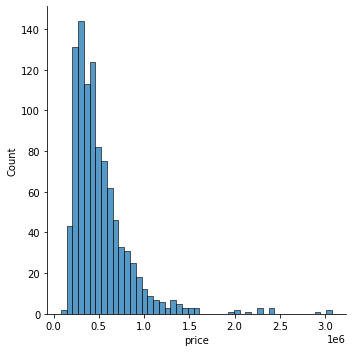

In [142]:
sns.displot(x='price', data=data_houseing);

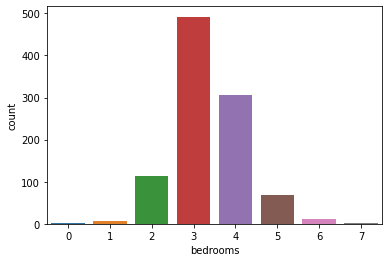

In [143]:
sns.countplot(x='bedrooms', data=data_houseing);

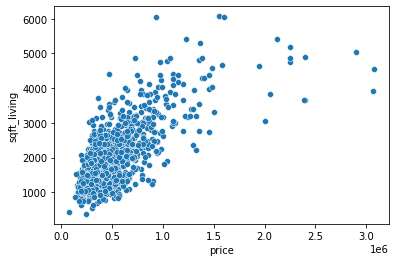

In [144]:
sns.scatterplot(x='price',y='sqft_living',data=data_houseing);

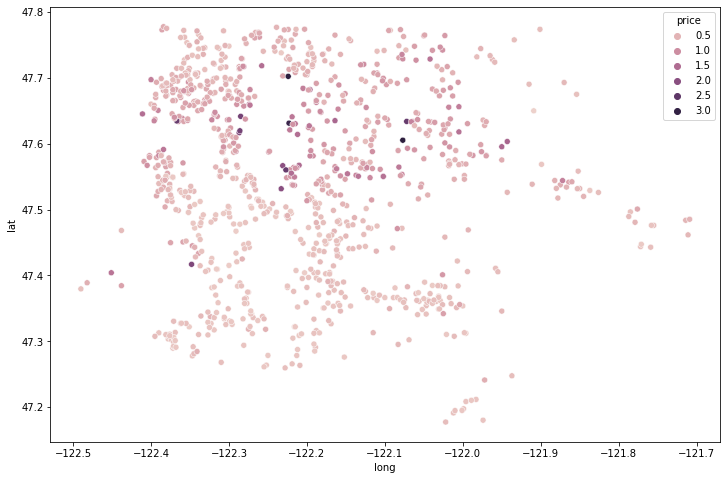

In [145]:
# Map correlation with the cost of houses
plt.figure(figsize=(12,8))
sns.scatterplot(x='long',y='lat',data=data_houseing,hue='price');

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:2076: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


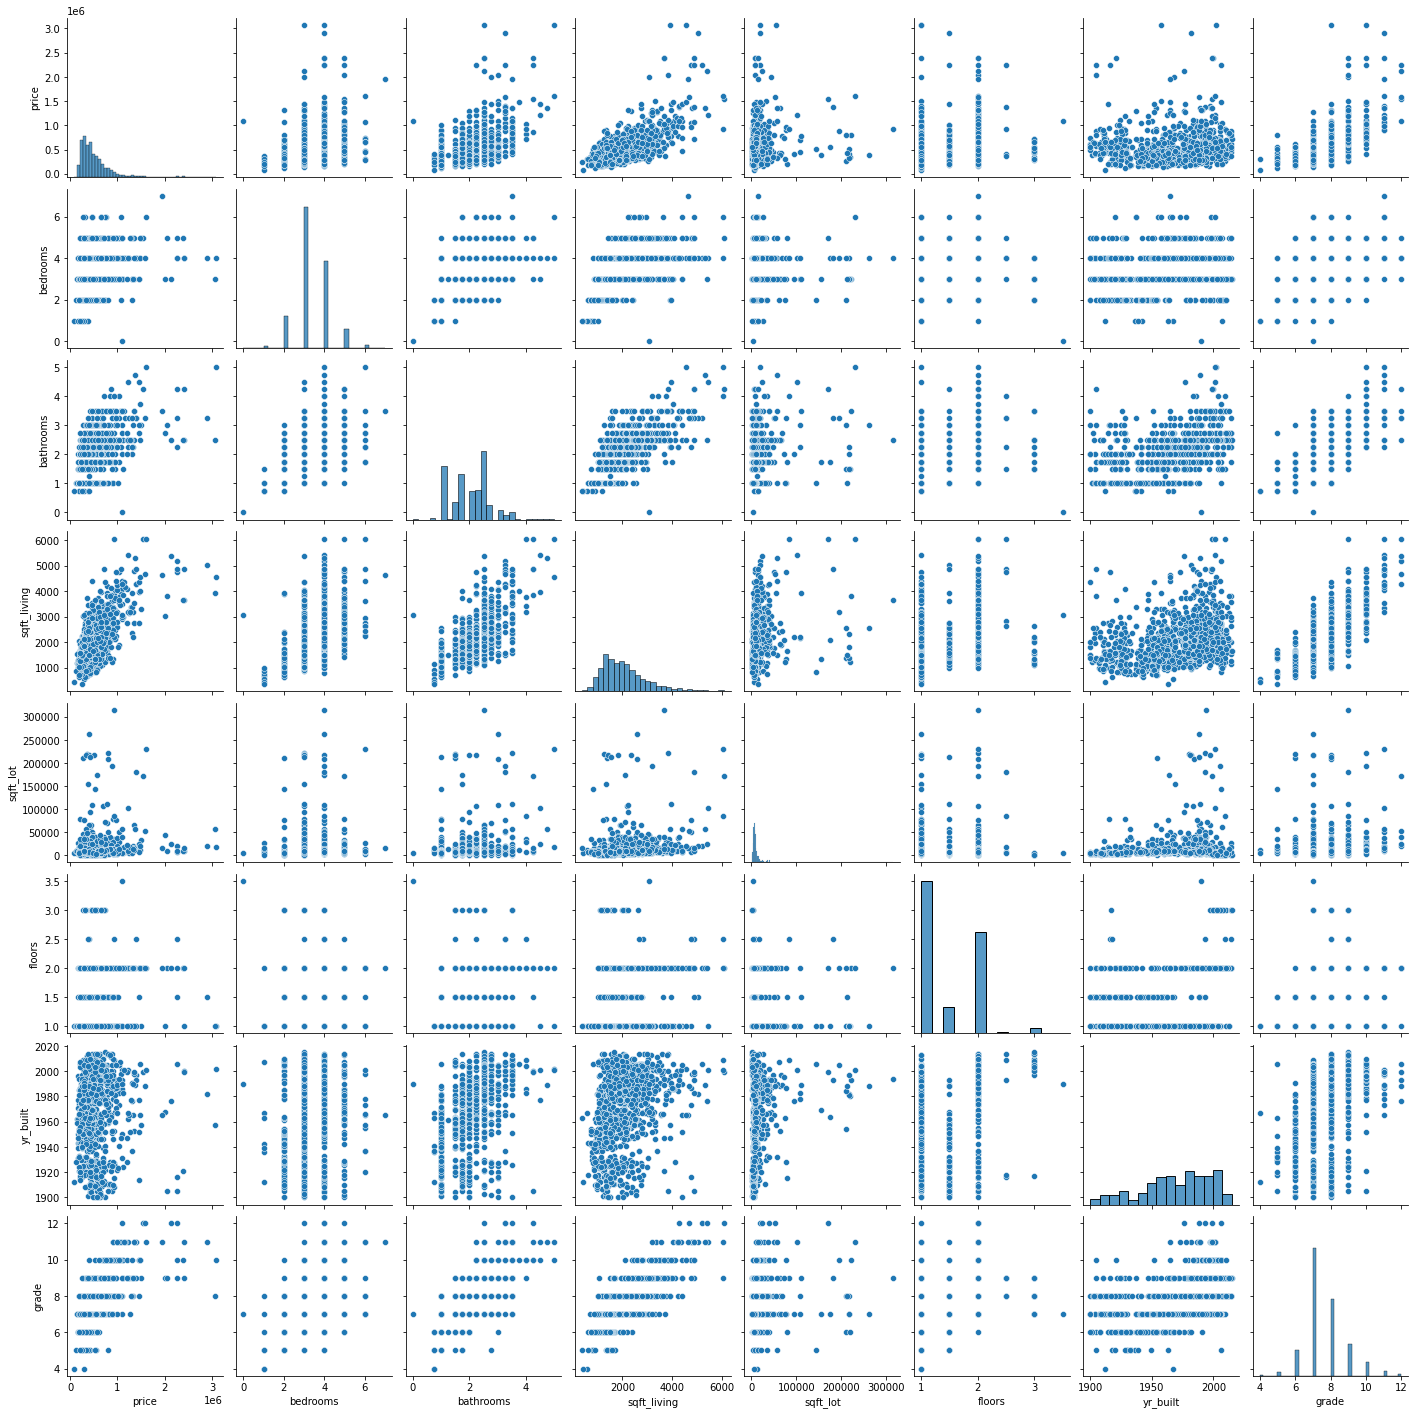

In [146]:
features = ['price','bedrooms','bathrooms','sqft_living','sqft_lot','floors','yr_built','grade']
sns.pairplot(data_houseing[features], size = 2.5)
plt.show()

In [167]:
X = data_houseing.iloc[:,3:]
y = data_houseing.iloc[:,2:3]

In [148]:
# X = data_houseing.loc[:, features]
# y = data_houseing.loc[:, ['price']]

In [168]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1, train_size = .75)

In [169]:
from sklearn import linear_model
regr = linear_model.LinearRegression()
regr.fit(X_train,y_train)
y_pred = regr.predict(X_test)
#y_pred

In [170]:
from sklearn.metrics import r2_score
print('Variance score: %.2f' % regr.score(X_test, y_test))
print("R^2 Score : %.2f" % r2_score(y_test,y_pred))

Variance score: 0.71
R^2 Score : 0.71


**Polynomial regression could give better results**

In [174]:
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(degree=2)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.fit_transform(X_test)
#X_train_poly

In [175]:
regr1 = linear_model.LinearRegression()
regr1.fit(X_train_poly,y_train)
y_pred_poly=regr1.predict(X_test_poly)
#y_pred_poly

In [176]:
print('Variance score: %.2f' % regr1.score(X_test_poly, y_test))
print("R^2 Score : %.2f" % r2_score(y_test,y_pred_poly))

Variance score: 0.62
R^2 Score : 0.62


In [177]:
for i in range(1,5):
    poly = PolynomialFeatures(degree=i)
    X_train_poly = poly.fit_transform(X_train)
    X_test_poly = poly.fit_transform(X_test)
    regr1 = linear_model.LinearRegression()
    regr1.fit(X_train_poly,y_train)
    y_pred_poly=regr1.predict(X_test_poly)
    print(f"for degree = {i}")
    print('Variance score: %.2f' % regr1.score(X_test_poly, y_test))
    print("R^2 Score : %.2f" % r2_score(y_test,y_pred_poly))

for degree = 1
Variance score: 0.71
R^2 Score : 0.71
for degree = 2
Variance score: 0.62
R^2 Score : 0.62
for degree = 3
Variance score: -3327.52
R^2 Score : -3327.52
for degree = 4
Variance score: -6784393519.84
R^2 Score : -6784393519.84
